In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(10)
# 38 field
# Two white fields for 0 and 00
# odds for red 18/38
win_odds = 18/38
runs = 10_000
aum = 1_000_000
max_sim_years = 30
performance_fee_rate = 0.10
management_fee_rate = 0.01
betsize_percentage = 0.1 

total_manager_compensation = []
end_aums = []
bancrupt_years = []
bancrupties = []
all_yealy_aums = []
for run in range(runs):
    yearly_aums = []
    bancrupt_year = max_sim_years
    aumcurrent = aum
    manager_compensation = 0
    for year in range(max_sim_years):
        yearly_aums.append(aumcurrent)
        aumlast = aumcurrent
        yearly_management_fee = aumcurrent * management_fee_rate
        aumcurrent -= yearly_management_fee 
        manager_compensation += yearly_management_fee
        won = False
        bancrupt = False
        betsize = aumlast * betsize_percentage
        while won == False and bancrupt == False:
            if np.random.random() < win_odds:
                aumcurrent += betsize
                won = True
            else:
                aumcurrent -= betsize
                if aumcurrent <= 0:
                    bancrupt = True
                elif aumcurrent >= betsize * 2:  
                    betsize = betsize * 2
                else:
                    betsize = aumcurrent
        if bancrupt == True:
            bancrupt_year = year
            yearly_aums.append(aumcurrent)
            break
        else:
            if aumcurrent > aumlast:
                yearly_performance_feee = (aumcurrent - aumlast) * performance_fee_rate
                aumcurrent -= yearly_performance_feee
                manager_compensation += yearly_performance_feee
    if bancrupt:
        bancrupties.append(1)
    else:
        bancrupties.append(0)
    total_manager_compensation.append(manager_compensation)
    end_aums.append(aumcurrent)
    bancrupt_years.append(bancrupt_year)
    all_yealy_aums.append(yearly_aums)
    
np_years = np.array(bancrupt_years)
np_aums = np.array(end_aums)
np_compensation = np.array(total_manager_compensation)
np_bancrupties = np.array(bancrupties)

## Question 1

In [3]:
print(f"What is the risk of bankruptcy? {np.mean(np_bancrupties):.1%}")

What is the risk of bankruptcy? 90.9%


## Question 2

In [4]:
print(f"What is the expected profit as the hedge fund manager? {np.mean(np_compensation):,.0f} €")

What is the expected profit as the hedge fund manager? 326,827 €


## Question 3

In [5]:
print(f"What is the expected profit/loss of the client? {np.mean(np_aums) - aum:,.0f} €")

What is the expected profit/loss of the client? -665,197 €


## Further analyses

### Show the chart of the AUM for one simulation

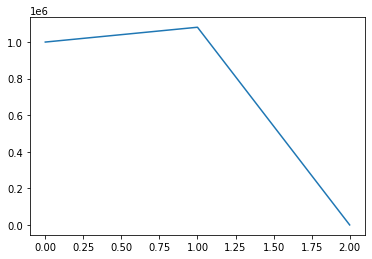

In [12]:
plt.plot(all_yealy_aums[5])
plt.show()

### Histogram of the bankruptcy years

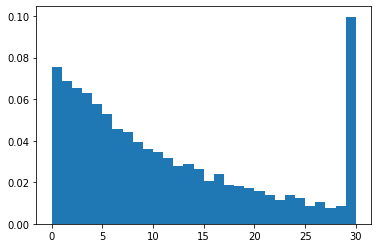

In [7]:
plt.hist(np_years, bins=max_sim_years, density=True)
plt.show()

In [8]:
print(f"What is the average year of the bankruptcy? {np.mean(np_years):.1f} years")

What is the average year of the bankruptcy? 10.9 years


In [9]:
print(f"What is the maximum profit as the hedge fund manager? {np.max(np_compensation):,.0f} €")

What is the maximum profit as the hedge fund manager? 2,192,262 €


In [13]:
print(f"What is the minimum profit as the hedge fund manager? {np.min(np_compensation):,.0f} €")

What is the maximum profit as the hedge fund manager? 10,000 €


### Histogram of the Hedge Fund Compensation

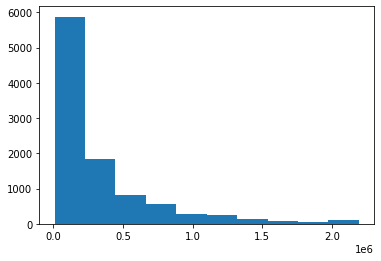

In [10]:
plt.hist(np_compensation)
plt.show()